# Metadata

```yaml
Course:    DS 5001
Module:    10 Lab
Topic:     Sentiment Analysis of Novels 
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```
**Purpose:** Use the NRC lexicon to explore sentiment in two novels.

# Set Up

## Config

In [1]:
data_in = '../data'
data_out = '../data'
data_prefix = 'novels'

In [2]:
novels_csv =  f'{data_in}/novels/{data_prefix}-CORPUS.csv'
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

In [3]:
dracula = ('stoker','dracula')
norabbey = ('austen','northangerabbey')

In [13]:
salex_csv = f'{data_in}/lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
# emo = 'polarity'
emo = 'sentiment'

## Import

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

In [9]:
sns.set()
# sns.set_style('whitegrid')

# Get Lexicon

In [14]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [15]:
# salex['polarity'] = salex.positive - salex.negative

In [16]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Get lexicon columns

In [17]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [18]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'sentiment']

# Get Novels

In [19]:
novels_csv

'../data/novels/novels-CORPUS.csv'

In [20]:
LIB = pd.read_csv(f"{data_in}/novels/{data_prefix}-LIB.csv").set_index('book_id').sort_index()

In [21]:
TOKENS = pd.read_csv(novels_csv).set_index(OHCO).sort_index()
TOKENS = TOKENS.join(LIB)
TOKENS = TOKENS.reset_index().set_index(['author_id']+OHCO)

In [22]:
LIB

,genre_id,author_id
book_id,,
adventures,d,doyle
baskervilles,d,doyle
castleofotranto,g,walpole
christmascarole,g,dickens
dracula,g,stoker
frankenstein,g,shelley
marieroget,d,poe
monk,g,lewis
moonstone,d,collins


In [23]:
TOKENS.head()

token_num  pos term_str  \
author_id book_id    chap_id para_num sent_num                            
doyle     adventures 1       0        1                 0   DT        a   
                                      1                 1  NNP  scandal   
                                      1                 2  NNP       in   
                                      1                 3  NNP  bohemia   
                             1        0                 0   NN        i   

                                               genre_id  
author_id book_id    chap_id para_num sent_num           
doyle     adventures 1       0        1               d  
                                      1               d  
                                      1               d  
                                      1               d  
                             1        0               d

In [24]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [25]:
TOKENS[salex.columns].sample(10)

,,,,,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
author_id,book_id,chap_id,para_num,sent_num,,,,,,,,,,,
walpole,castleofotranto,2,141,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
stoker,dracula,19,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
doyle,adventures,4,32,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
radcliffe,udolpho,31,12,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
christie,secretadversary,18,147,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
doyle,signoffour,12,119,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
lewis,monk,6,54,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
christie,styles,4,23,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
radcliffe,udolpho,52,38,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [26]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  \
author_id book_id    chap_id para_num sent_num                      
doyle     adventures 1       153      0               good    0.0   
stoker    dracula    19      16       1               show    0.0   
radcliffe udolpho    50      41       7               over    0.0   
collins   moonstone  60      50       0              knows    0.0   
                     72      0        5                 it    0.0   
radcliffe udolpho    19      17       0              carlo    0.0   
doyle     adventures 4       19       1                 of    0.0   
radcliffe udolpho    13      23       1              emily    0.0   
lewis     monk       2       21       0         sufficient    0.0   
                     4       187      8          fruitless    0.0   

                                                anticipation  disgust  fear  \
author_id book_id    chap_id para_num sent_num                                
doyle     adventures 1       153      0                  1.0      0.0   0.0   
stoker    dracula    19      16       1                  0.0      0.0   0.0   
radcliffe udolpho    50      41       7                  0.0      0.0   0.0   
collins   moonstone  60      50       0                  0.0      0.0   0.0   
                     72      0        5                  0.0      0.0   0.0   
radcliffe udolpho    19      17       0                  0.0      0.0   0.0   
doyle     adventures 4       19       1                  0.0      0.0   0.0   
radcliffe udolpho    13      23       1                  0.0      0.0   0.0   
lewis     monk       2       21       0                  0.0      0.0   0.0   
                     4       187      8                  0.0      0.0   0.0   

                                                joy  sadness  surprise  trust  \
author_id book_id    chap_id para_num sent_num                                  
doyle     adventures 1       153      0         1.0      0.0       1.0    1.0   
stoker    dracula    19      16       1         0.0      0.0       0.0    0.0   
radcliffe udolpho    50      41       7         0.0      0.0       0.0    0.0   
collins   moonstone  60      50       0         0.0      0.0       0.0    0.0   
                     72      0        5         0.0      0.0       0.0    0.0   
radcliffe udolpho    19      17       0         0.0      0.0       0.0    0.0   
doyle     adventures 4       19       1         0.0      0.0       0.0    0.0   
radcliffe udolpho    13      23       1         0.0      0.0       0.0    0.0   
lewis     monk       2       21       0         0.0      0.0       0.0    0.0   
                     4       187      8         0.0      1.0       0.0    0.0   

                                                sentiment  
author_id book_id    chap_id para_num sent_num             
doyle     adventures 1       153      0               1.0  
stoker    dracula    19      16       1               0.0  
radcliffe udolpho    50      41       7               0.0  
collins   moonstone  60      50       0               0.0  
                     72      0        5               0.0  
radcliffe udolpho    19      17       0               0.0  
doyle     adventures 4       19       1               0.0  
radcliffe udolpho    13      23       1               0.0  
lewis     monk       2       21       0               0.0  
                     4       187      8              -1.0

In [27]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [28]:
TOKENS.head()

token_num  pos term_str  \
author_id book_id    chap_id para_num sent_num                            
doyle     adventures 1       0        1                 0   DT        a   
                                      1                 1  NNP  scandal   
                                      1                 2  NNP       in   
                                      1                 3  NNP  bohemia   
                             1        0                 0   NN        i   

                                               genre_id  anger  anticipation  \
author_id book_id    chap_id para_num sent_num                                 
doyle     adventures 1       0        1               d    0.0           0.0   
                                      1               d    0.0           0.0   
                                      1               d    0.0           0.0   
                                      1               d    0.0           0.0   
                             1        0               d    0.0           0.0   

                                                disgust  fear  joy  negative  \
author_id book_id    chap_id para_num sent_num                                 
doyle     adventures 1       0        1             0.0   0.0  0.0       NaN   
                                      1             0.0   1.0  0.0       1.0   
                                      1             0.0   0.0  0.0       NaN   
                                      1             0.0   0.0  0.0       NaN   
                             1        0             0.0   0.0  0.0       NaN   

                                                positive  sadness  surprise  \
author_id book_id    chap_id para_num sent_num                                
doyle     adventures 1       0        1              NaN      0.0       0.0   
                                      1              0.0      0.0       0.0   
                                      1              NaN      0.0       0.0   
                                      1              NaN      0.0       0.0   
                             1        0              NaN      0.0       0.0   

                                                trust  sentiment  
author_id book_id    chap_id para_num sent_num                    
doyle     adventures 1       0        1           0.0        0.0  
                                      1           0.0       -1.0  
                                      1           0.0        0.0  
                                      1           0.0        0.0  
                             1        0           0.0        0.0

In [29]:
DRACULA = TOKENS.sort_index().loc[dracula].copy()
NORABBEY = TOKENS.sort_index().loc[norabbey].copy()

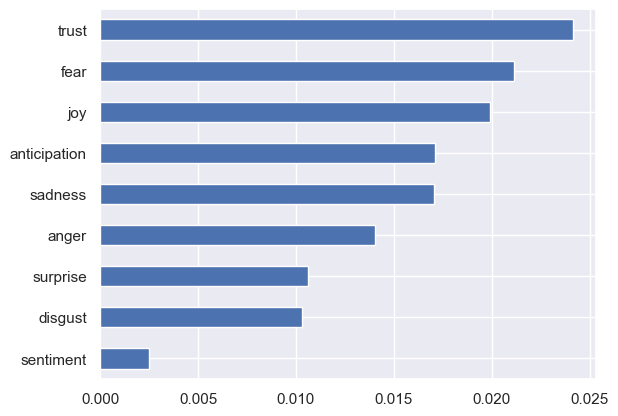

In [30]:
DRACULA[emo_cols].mean().sort_values().plot.barh();

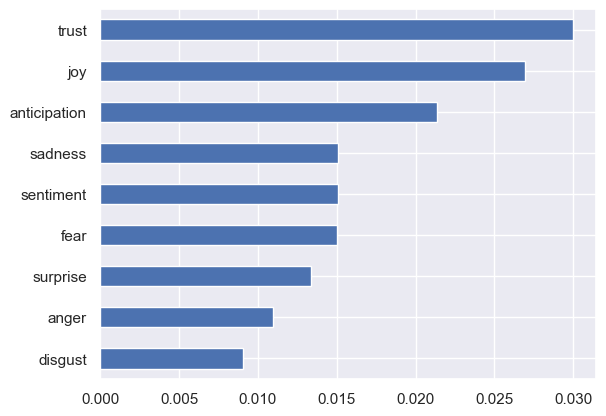

In [31]:
NORABBEY[emo_cols].mean().sort_values().plot.barh();

## Sentiment by Chapter

In [35]:
DRACULA_chaps = DRACULA.groupby(CHAPS)[emo_cols].mean()

In [36]:
NORABBEY_chaps = NORABBEY.groupby(CHAPS)[emo_cols].mean()

In [37]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

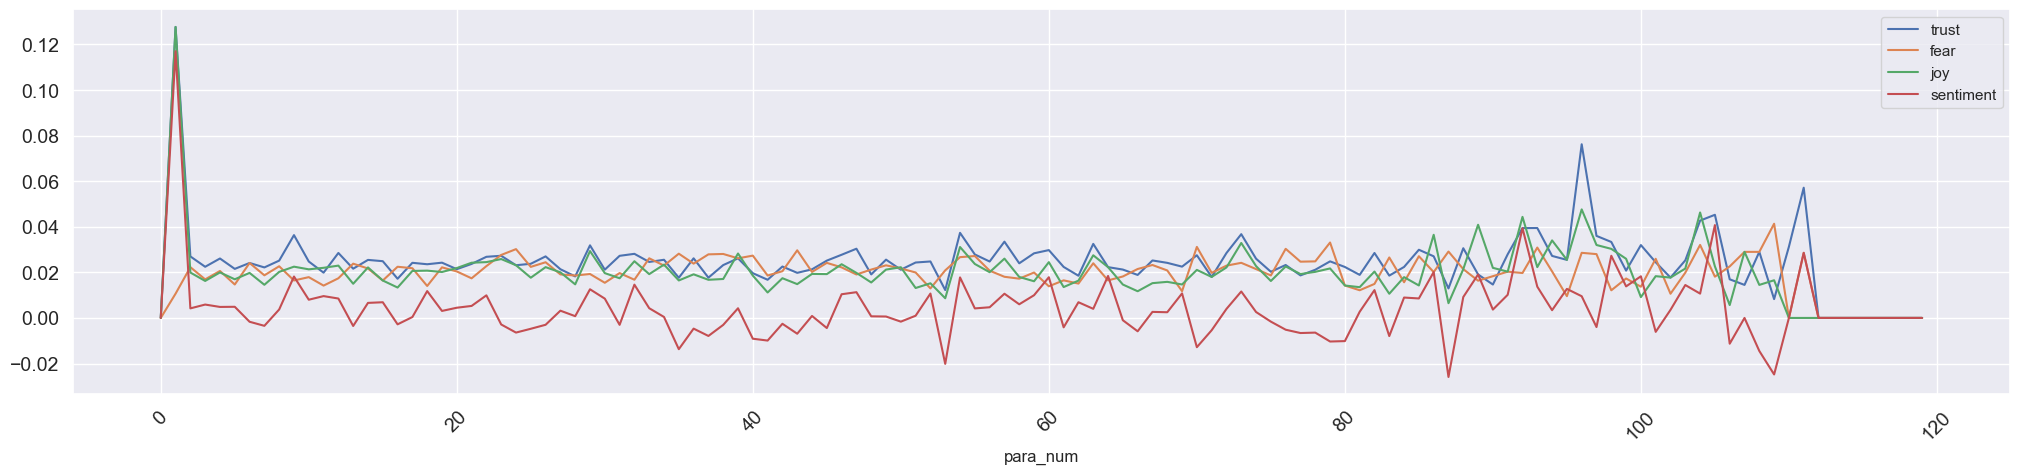

In [38]:
plot_sentiments(DRACULA_chaps, ['trust','fear','joy','sentiment'])

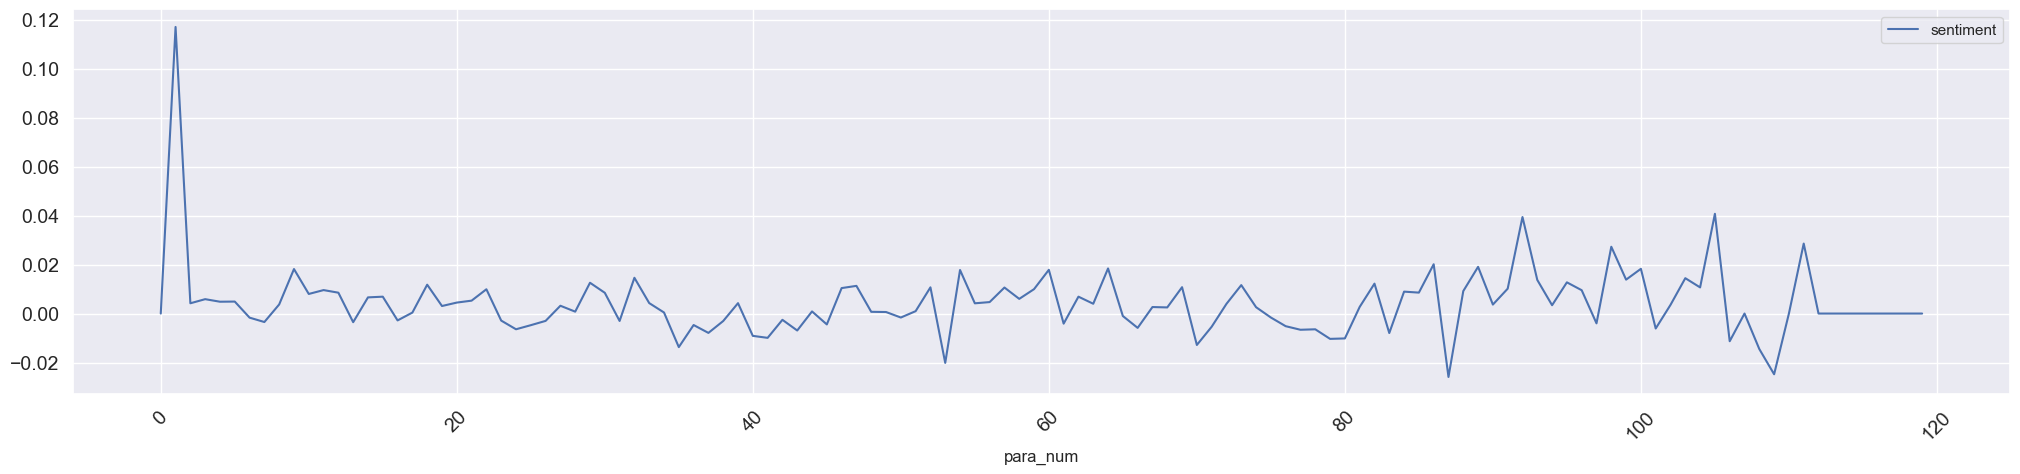

In [39]:
plot_sentiments(DRACULA_chaps, ['sentiment'])

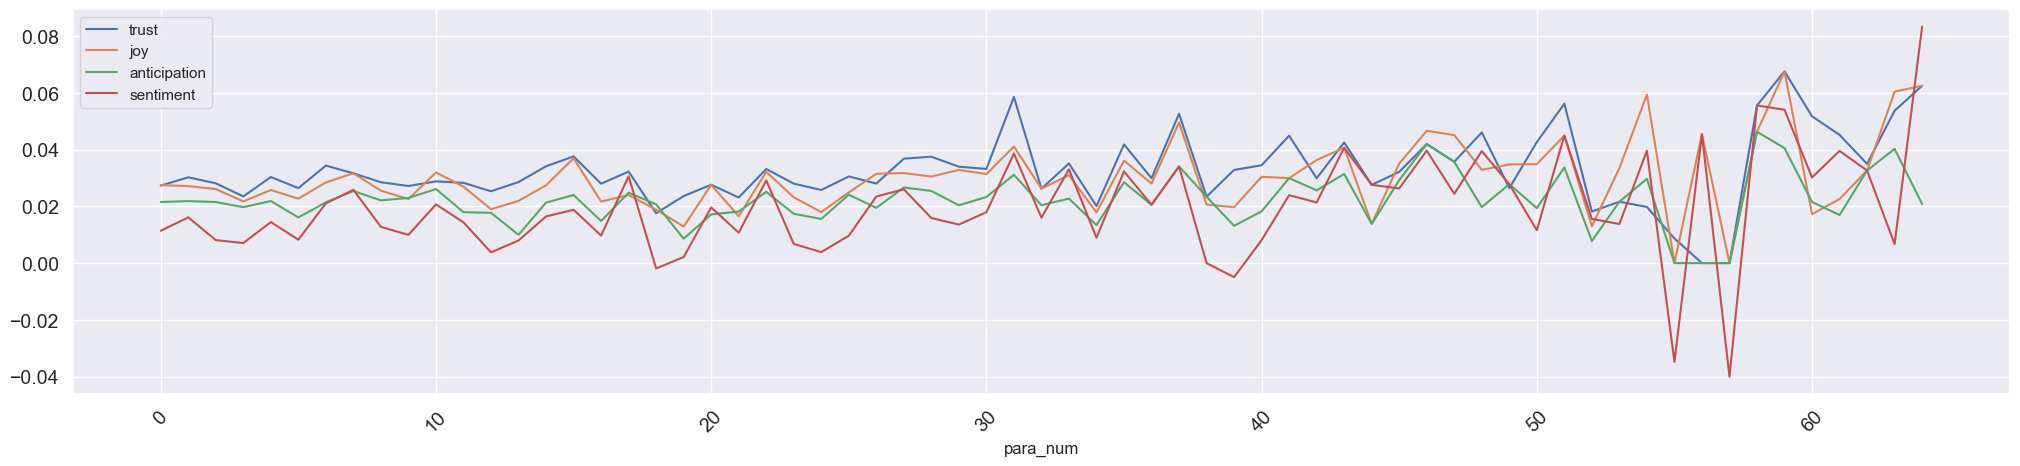

In [40]:
plot_sentiments(NORABBEY_chaps, ['trust','joy','anticipation','sentiment'])

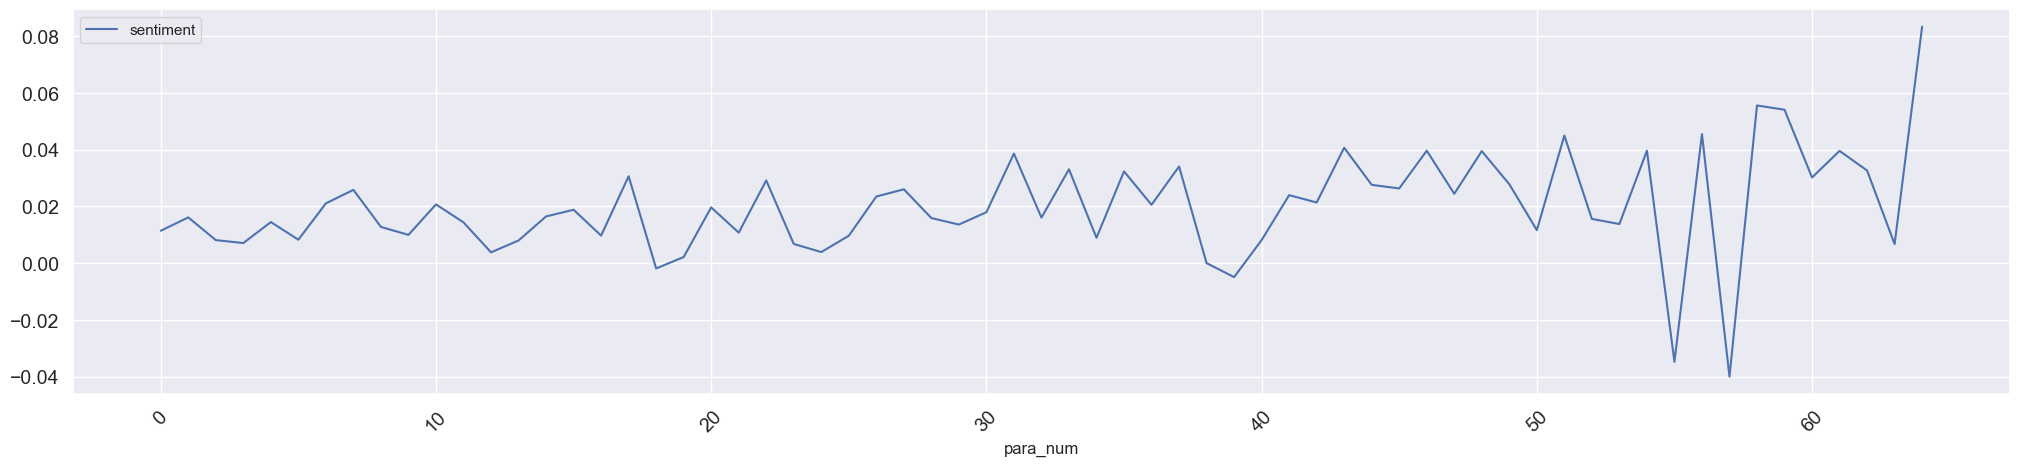

In [41]:
plot_sentiments(NORABBEY_chaps, ['sentiment'])

# Explore Sentiment in Texts

In [42]:
DRACULA

token_num  pos  term_str genre_id  anger  \
chap_id para_num sent_num                                             
1       0        0                 0  NNP  jonathan        g    0.0   
                 0                 1  NNP   harkers        g    0.0   
                 0                 2  NNP   journal        g    0.0   
        1        0                 0   NN      kept        g    0.0   
                 0                 1   IN        in        g    0.0   
...                              ...  ...       ...      ...    ...   
27      119      0                 6   IN        of        g    0.0   
                 0                 7  NNP   dracula        g    0.0   
                 0                 8   IN        by        g    0.0   
                 0                 9  NNP      bram        g    0.0   
                 0                10  NNP    stoker        g    0.0   

                           anticipation  disgust  fear  joy  negative  \
chap_id para_num sent_num                                               
1       0        0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
        1        0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
...                                 ...      ...   ...  ...       ...   
27      119      0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   
                 0                  0.0      0.0   0.0  0.0       NaN   

                           positive  sadness  surprise  trust  sentiment  
chap_id para_num sent_num                                                 
1       0        0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
        1        0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
...                             ...      ...       ...    ...        ...  
27      119      0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  
                 0              NaN      0.0       0.0    0.0        0.0  

[162045 rows x 15 columns]

In [43]:
DRACULA['html'] =  DRACULA.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
NORABBEY['html'] =  NORABBEY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [44]:
DRACULA['html'].sample(10)

chap_id  para_num  sent_num
3        26        7             <span class='sent0'>for</span>
27       8         12          <span class='sent0'>night</span>
7        16        4            <span class='sent0'>took</span>
6        6         5              <span class='sent0'>is</span>
16       30        2           <span class='sent0'>shall</span>
5        11        4            <span class='sent1'>deal</span>
20       10        2             <span class='sent0'>new</span>
24       14        0             <span class='sent0'>for</span>
27       40        1           <span class='sent0'>which</span>
14       3         13             <span class='sent0'>if</span>
Name: html, dtype: object

In [45]:
DRACULA_sents = DRACULA.groupby(SENTS)[emo_cols].mean()
NORABBEY_sents = NORABBEY.groupby(SENTS)[emo_cols].mean()

In [46]:
DRACULA_sents['sent_str'] = DRACULA.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
DRACULA_sents['html_str'] = DRACULA.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [47]:
NORABBEY_sents['sent_str'] = NORABBEY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
NORABBEY_sents['html_str'] = NORABBEY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [48]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [49]:
sample_sentences(DRACULA_sents)

In [50]:
sample_sentences(NORABBEY_sents)

## VADER

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [52]:
DRACULA_vader_cols = DRACULA_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
DRACULA_vader = pd.concat([DRACULA_sents, DRACULA_vader_cols], axis=1)

In [53]:
# DRACULA_vader.head()

<AxesSubplot: xlabel='para_num,sent_num'>

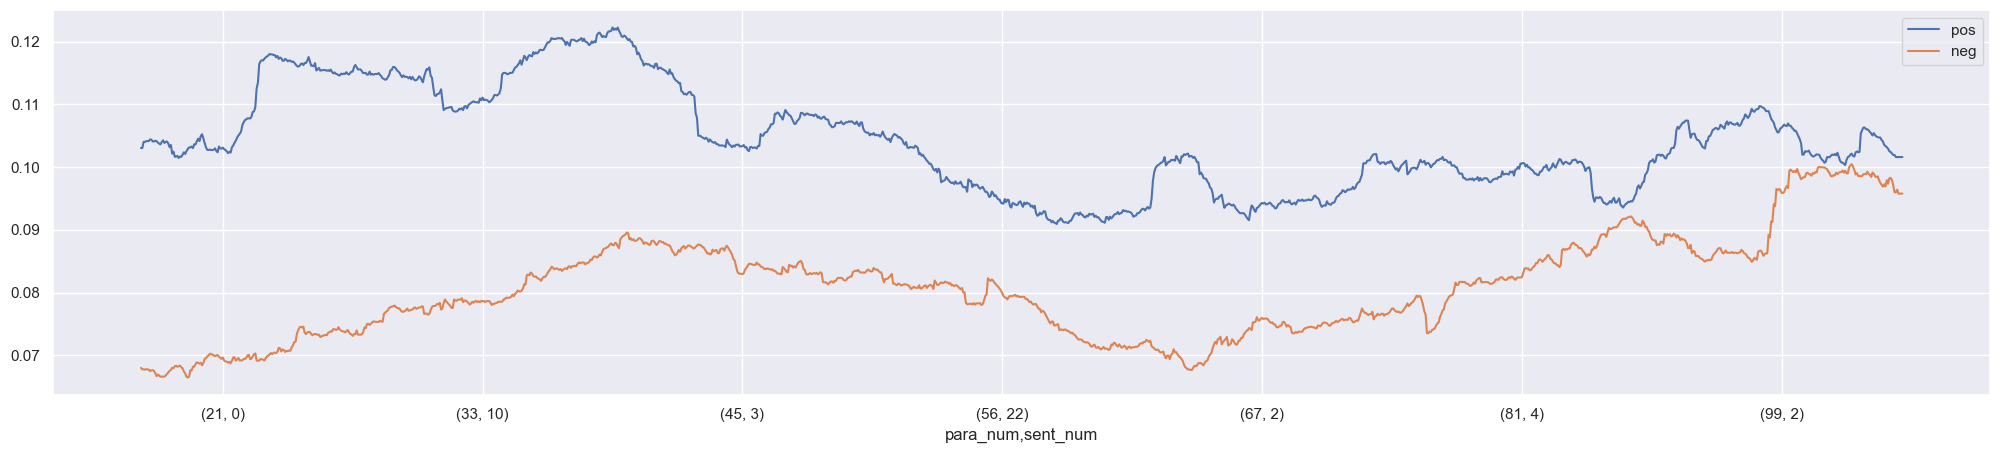

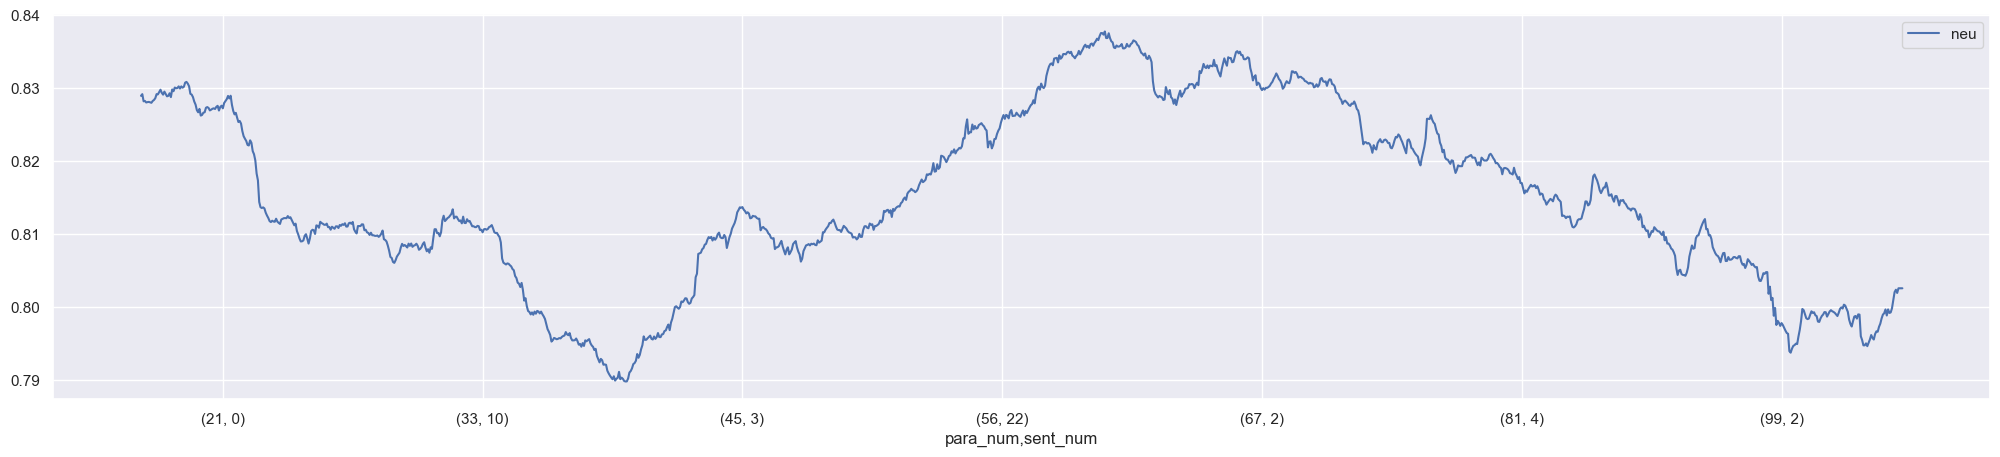

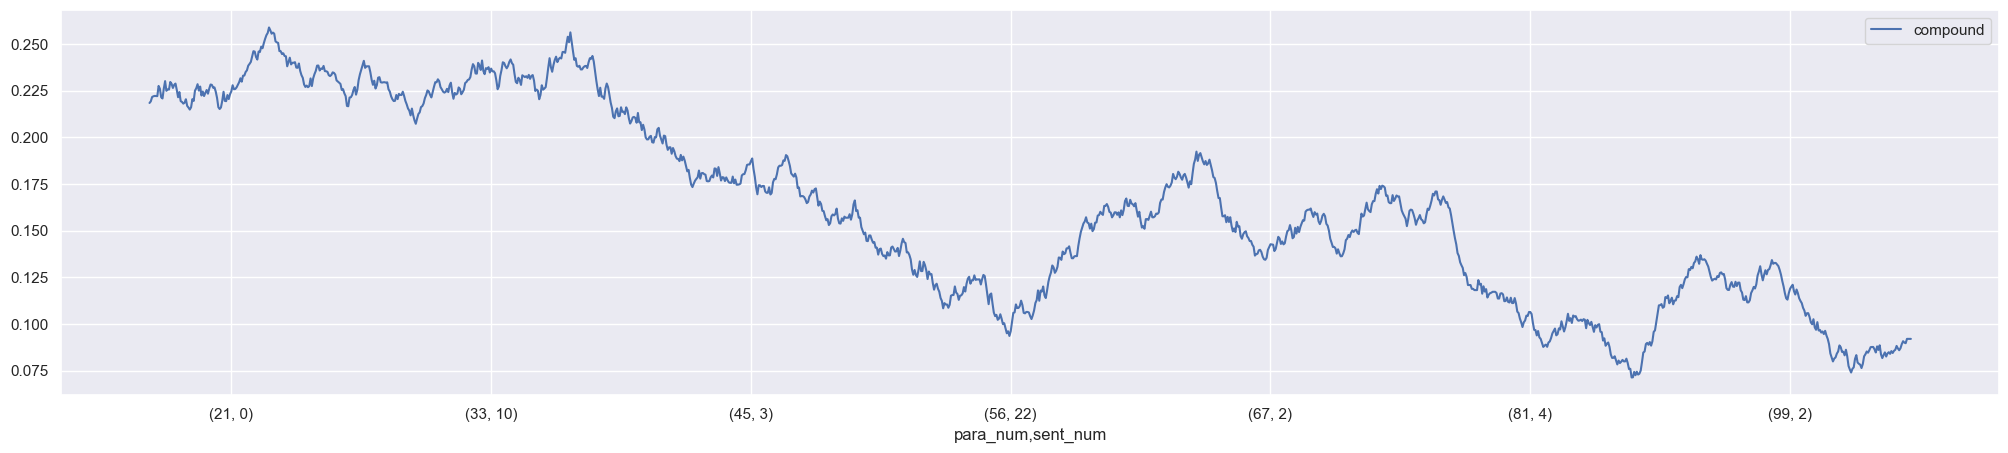

In [54]:
w = int(DRACULA_vader.shape[0] / 5)
DRACULA_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
DRACULA_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
DRACULA_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [55]:
NORABBEY_vader_cols = NORABBEY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
NORABBEY_vader = pd.concat([NORABBEY_sents, NORABBEY_vader_cols], axis=1)

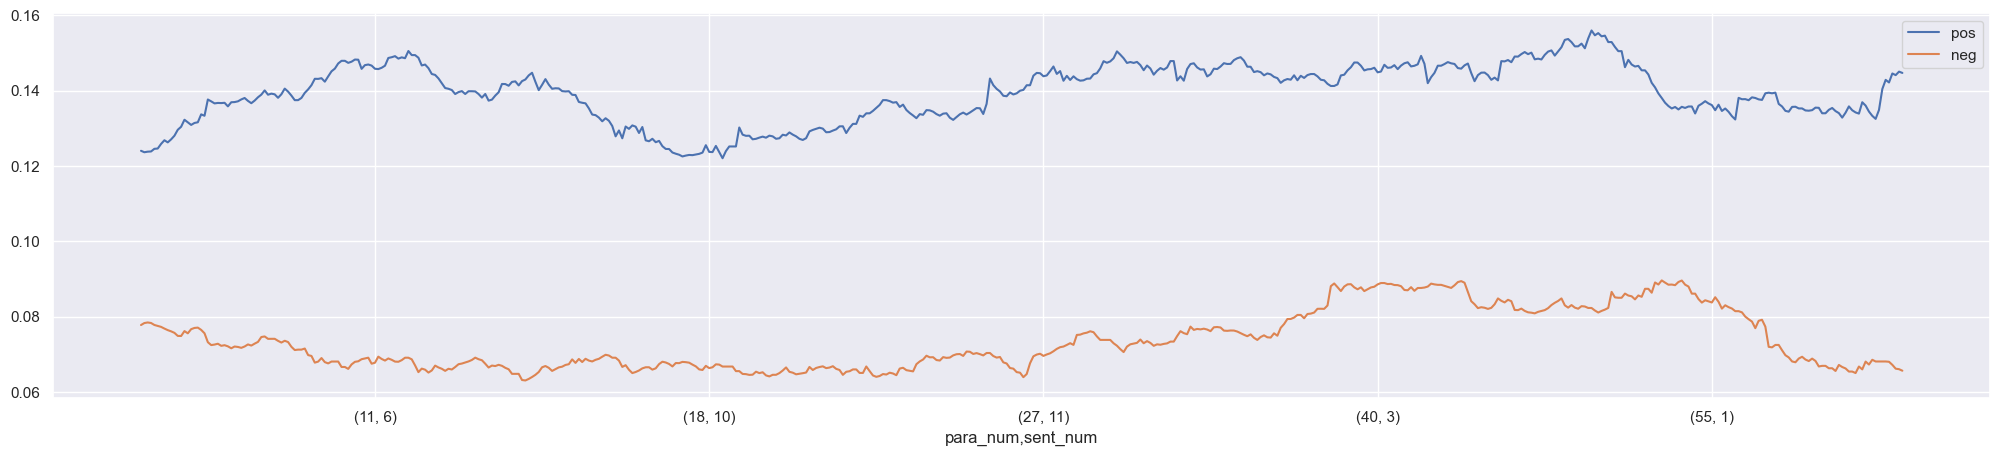

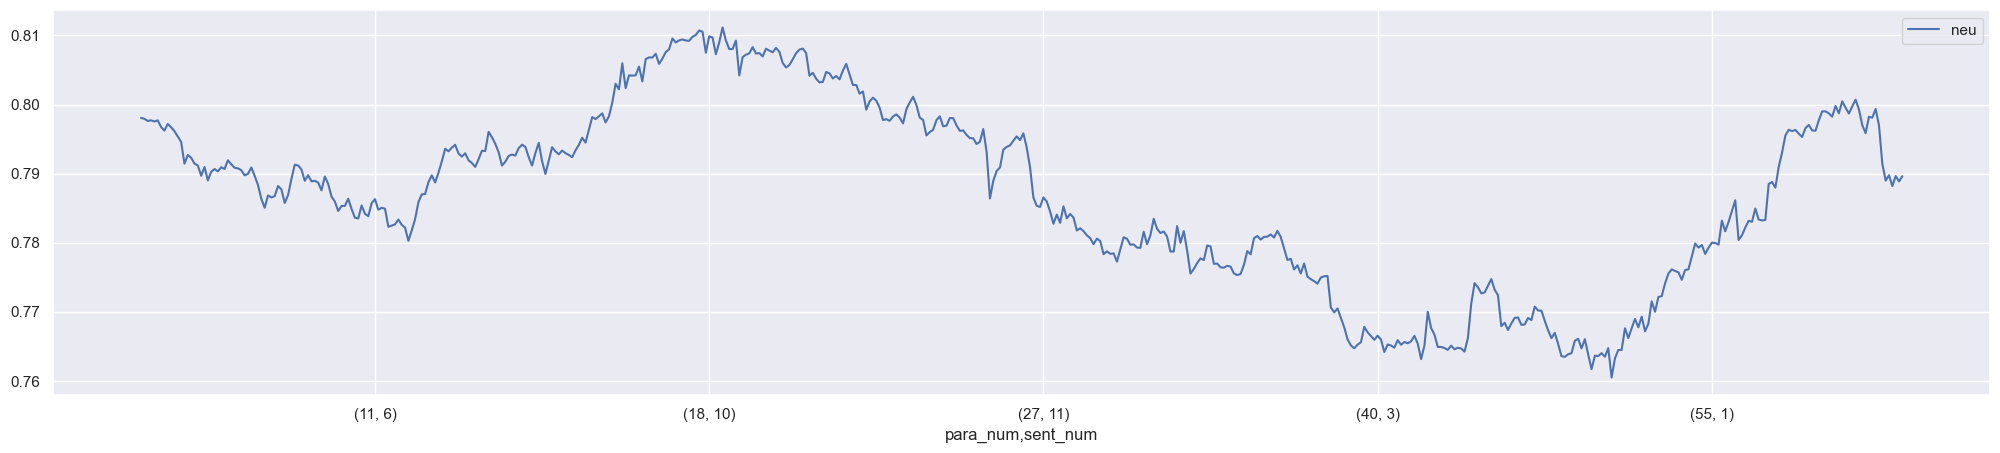

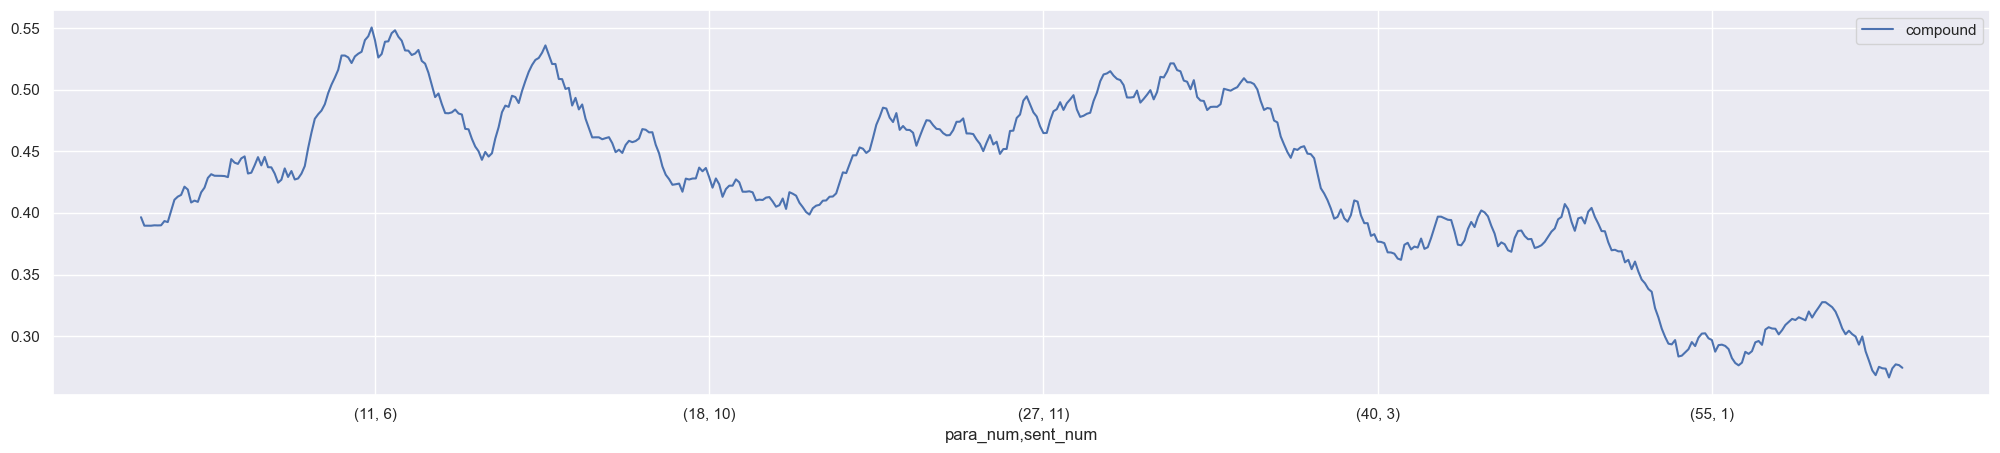

In [59]:
w = int(NORABBEY_vader.shape[0] / 5)
NORABBEY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
NORABBEY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
NORABBEY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));